In [1]:
import os
import pandas as pd
import numpy as np

import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
# CONVERTED_FOLDER_DIR = "./data/02. 표준데이터(PSA)/"

CONVERTED_FOLDER_DIR = "./Cross Correlation Data/Cross Correlation_위상변환_PSA/test/"
CONVERTED_JPEG_FOLDER_DIR = "./Cross Correlation Data/Cross Correlation_위상변환_PSA_jpeg/test/"

In [18]:
labels = [label for label in os.listdir(CONVERTED_FOLDER_DIR)] # ['03. Noise (54)', '00. Void (204)', '02. Surface (144)', '01. Corona (81)']
print(labels)

images = []
files = []

class_labels = []
print("Loading {}".format(CONVERTED_FOLDER_DIR))
  
for label in labels: # ['Noise', 'Void', 'Surface', 'Corona']
    for file in tqdm(os.listdir(os.path.join(CONVERTED_FOLDER_DIR, label))): 
        img_path = os.path.join(os.path.join(CONVERTED_FOLDER_DIR, label), file) # ./split_data/05. 표준데이터(PRPD)/train/Noise/SMND_345kV_EBG_A_S_0A_62_20190613164700.dat[PRPD변환].csv

        image = pd.read_csv(img_path, names=range(0, 256))
        image = np.pad(image, (2,2), 'constant', constant_values=0) # 256 -> 260
        image = np.reshape(image, (260, 260, 1))
        
        images.append(image)
        files.append((label, img_path))

['Corona', 'Noise', 'Surface', 'Void']


In [10]:
images = np.array(images)

# 0 이외의 숫자 1로 정규화
images[images > 0] = 1
images = images.astype('float32')
images.shape

(98, 260, 260, 1)

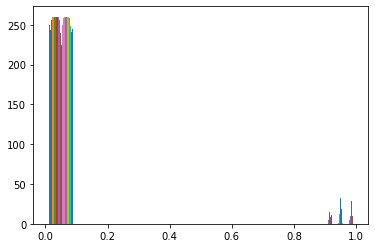

In [11]:
da = np.reshape(images[0], (260,260))
plt.hist(da)
plt.show()

In [12]:
images_3 = np.full((images.shape[0], 260, 260, 3), 0.0)

for i, s in enumerate(images):
    images_3[i] = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB) 

('Corona', './Cross Correlation Data/Cross Correlation_위상변환_PSA/test/Corona\\SMND_345kV_EBG_A_S_0A_62_20190515133600.dat[PSA변환].csv')
(98, 260, 260, 3)


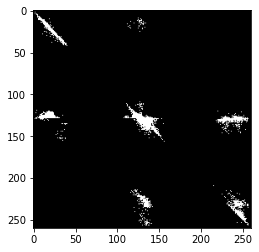

In [13]:
g = plt.imshow(images_3[0])
print(files[0])
print(images_3.shape)

In [14]:

# Create save folder
for label in labels:
    added_folder_name = CONVERTED_JPEG_FOLDER_DIR+label 
    if not os.path.exists(added_folder_name):
        os.makedirs(added_folder_name)
        
for image, file in zip(images_3, files):
    label, file_name = file
    file_name = file_name.split('\\')[-1].split("csv")[0]
    plt.imsave(CONVERTED_JPEG_FOLDER_DIR + label + "/"+file_name+"jpeg",image)